# Explore here

In [210]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [176]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [177]:
df.info

<bound method DataFrame.info of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       

In [178]:
# Latitud, Longitud e IncMed.

df_clear = df[['MedInc', 'Latitude', 'Longitude']]
df_clear

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_clear, test_size = 0.2, random_state = 11)
X_train.head()

,MedInc,Latitude,Longitude
20025,1.7756,36.07,-119.05
10772,5.5422,33.66,-117.89
16691,2.7301,35.13,-120.61
11946,2.4922,33.93,-117.43
6532,3.2900,34.07,-118.08


In [180]:
from sklearn.cluster import KMeans

mod_kmeans = KMeans(n_clusters = 6, n_init = 'auto', random_state = 11)
mod_kmeans.fit(X_train)

KMeans(n_clusters=6, n_init='auto', random_state=11)

In [181]:
y_train= list(mod_kmeans.labels_)
X_train['cluster'] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
20025,1.7756,36.07,-119.05,2
10772,5.5422,33.66,-117.89,1
16691,2.7301,35.13,-120.61,2
11946,2.4922,33.93,-117.43,5
6532,3.2900,34.07,-118.08,5


'viridis', 'coolwarm', 'cividis', 'magma'

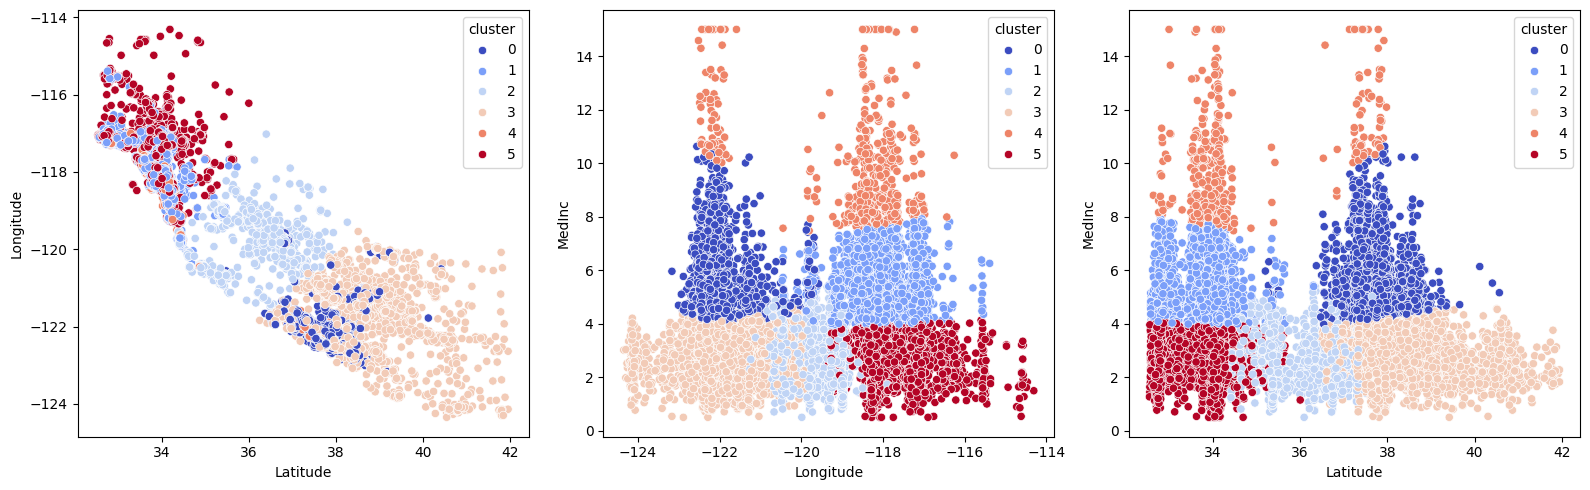

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots (1, 3, figsize = (16, 5))

sns.scatterplot(ax = axis [0], data = X_train, x = 'Latitude', y = 'Longitude', hue = 'cluster', palette= 'coolwarm')
sns.scatterplot(ax = axis [1], data = X_train, x = 'Longitude', y = 'MedInc', hue = 'cluster', palette= 'coolwarm')
sns.scatterplot(ax = axis [2], data = X_train, x = 'Latitude', y = 'MedInc', hue = 'cluster', palette= 'coolwarm')

plt.tight_layout()
plt.show()

In [183]:
y_test = list(mod_kmeans.predict(X_test))
X_test['cluster'] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
2734,3.2083,32.78,-115.56,5
9087,5.7049,34.66,-118.17,1
15789,1.6125,37.78,-122.40,3
12992,5.2586,38.69,-121.26,0
19275,5.0380,38.42,-122.79,0


In [184]:
sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

<Figure size 640x480 with 0 Axes>

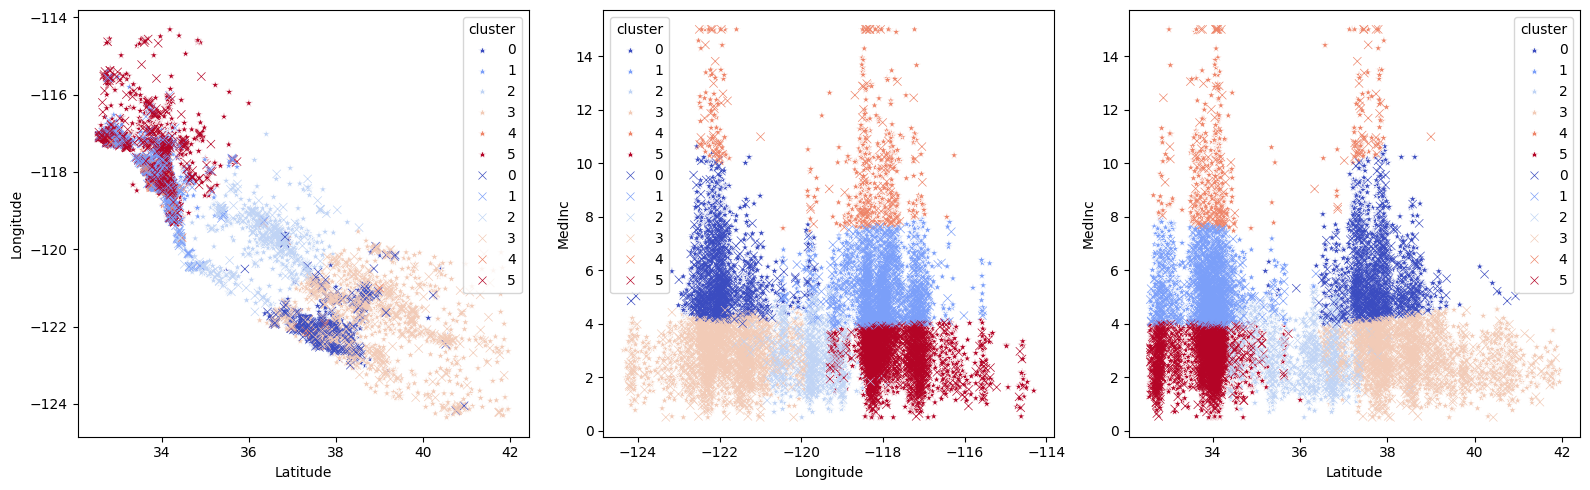

In [185]:
fig, axis = plt.subplots (1, 3, figsize = (16, 5))

sns.scatterplot(ax = axis [0], data = X_train, x = 'Latitude', y = 'Longitude', hue = 'cluster', palette= 'coolwarm', marker = '*')
sns.scatterplot(ax = axis [1], data = X_train, x = 'Longitude', y = 'MedInc', hue = 'cluster', palette= 'coolwarm', marker = '*')
sns.scatterplot(ax = axis [2], data = X_train, x = 'Latitude', y = 'MedInc', hue = 'cluster', palette= 'coolwarm', marker = '*')

sns.scatterplot(ax = axis [0], data = X_test, x = 'Latitude', y = 'Longitude', hue = 'cluster', palette= 'coolwarm', marker = 'x')
sns.scatterplot(ax = axis [1], data = X_test, x = 'Longitude', y = 'MedInc', hue = 'cluster', palette= 'coolwarm', marker = 'x')
sns.scatterplot(ax = axis [2], data = X_test, x = 'Latitude', y = 'MedInc', hue = 'cluster', palette= 'coolwarm', marker = 'x')

plt.tight_layout()
plt.show()

In [186]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors= 6)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [187]:
y_pred = knn_model.predict(X_test)
y_pred

array([5, 1, 3, ..., 5, 1, 5], dtype=int32)

In [188]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [194]:
from sklearn.model_selection import ParameterGrid

hyperparam  = {
    'n_neighbors':[3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'metric':['euclidean', "manhattan","cityblock","minkowski"]
}


In [195]:
# Inicializar variables para el mejor modelo
best_accuracy = 0
best_combination = None

# Bucle de búsqueda en cuadrícula
for combination in ParameterGrid(hyperparam):
    model = KNeighborsClassifier(**combination)
    model.fit(X_train, y_train)   
    y_pred = model.predict(X_test)  # Predicciones en el conjunto de prueba
    acc = accuracy_score(y_test, y_pred)  # Evaluar en el conjunto de prueba

    if acc > best_accuracy:
        best_accuracy = acc
        best_combination = combination
        
print("Best Combination:", best_combination)
print("Best Accuracy on Test Set:", best_accuracy)

Best Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best Accuracy on Test Set: 1.0


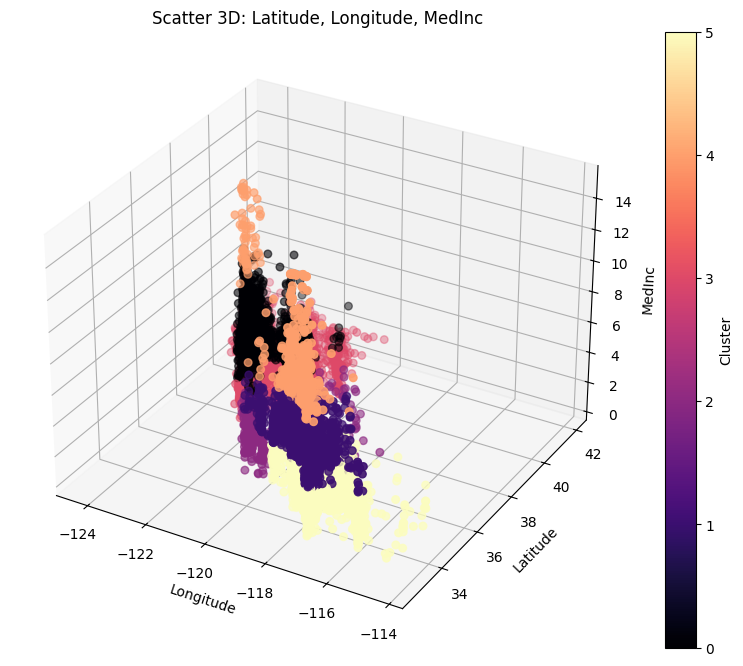

In [203]:
# Create figure for 3D graphic

plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d')

ax.scatter(X_train['Longitude'], X_train['Latitude'], X_train['MedInc'], c= X_train['cluster'], cmap= 'magma', s= 30)

plt.colorbar(ax.collections[0]).set_label('Cluster')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('MedInc')
ax.set_title('Scatter 3D: Latitude, Longitude, MedInc')

plt.show()

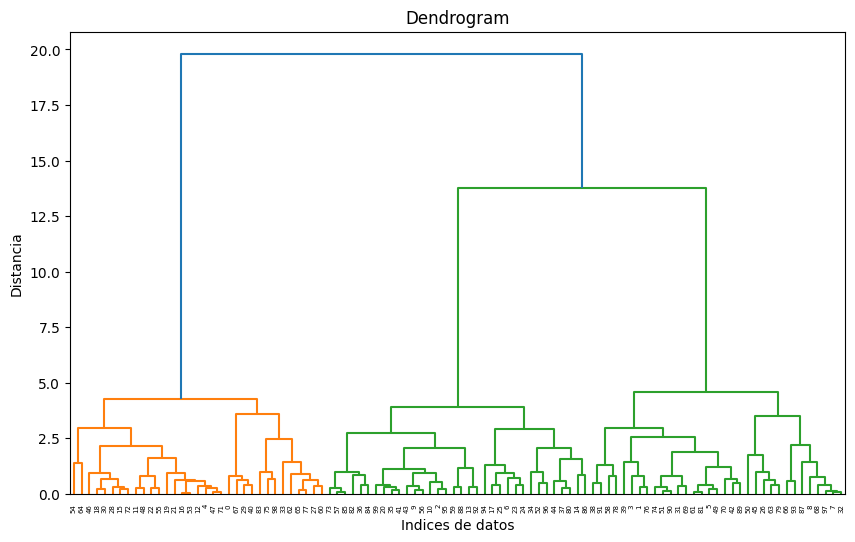

In [209]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate a sample dataset
X, _ = make_blobs(n_samples = 100, centers = 3, random_state = 42)

# Calculate the similarity matrix between clusters
Z = linkage(X, method = 'complete')

# Display the dendrogram
plt.figure(figsize = (10, 6))

dendrogram(Z)

plt.title('Dendrogram')
plt.xlabel('Indices de datos')
plt.ylabel('Distancia')
plt.show()

/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


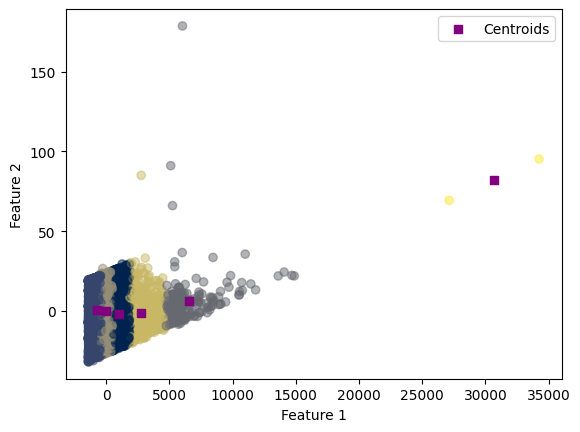

In [220]:
numero_clusters = 6

#Importo el modelo de reduccion de dimensionalidad
from sklearn.decomposition import PCA

# Reduccion de Dimensionalidad 
pca = PCA(n_components= 3)
X_pca = pca.fit_transform(df)

# Entrenar el modelo
model = KMeans(n_clusters = numero_clusters, random_state = 11)
model.fit(X_pca)

# Realizar predicciones con datos nuevos

new_data = np.array([[1, 3, 2], [0, 4, 3], [3, 5, 9]])

predictions = model.predict(new_data)

# Visualizar los clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= model.labels_, cmap= 'cividis', alpha=0.5)
#plt.scatter(new_data[:, 0], new_data[:, 1], c='red', marker='x', label='New Data')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c= 'purple', marker= 's', label= 'Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
from pickle import dump

dump(mod_kmeans, open('../models/k-means_n_clusers-6_n_init-auto_11.sav', 'wb'))
dump(knn_model, open('../models/knn_n_neighbors-3_algorithm-auto_metric-euclidean_p-1_weights-uniform_11.sav', 'wb'))

In [191]:
# best_model = KNeighborsClassifier(**best_combination)
# best_model.fit(X_train, y_train)
# y_pred = best_model

In [193]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier

# # Define el modelo KNN
# knn = KNeighborsClassifier()

# # Define los hiperparámetros a ajustar
# param_grid = {
#     'n_neighbors': [3, 5, 7],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2],
#     'metric': ['euclidean', 'manhattan'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
# }

# # Realiza la búsqueda en cuadrícula con validación cruzada
# grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Imprime los mejores hiperparámetros encontrados
# print("Mejores hiperparámetros:", grid_search.best_params_)

# # Obtiene el modelo con los mejores hiperparámetros
# best_knn = grid_search.best_estimator_

# # Evalúa el modelo en el conjunto de prueba
# accuracy = best_knn.score(X_test, y_test)
# print("Accuracy en conjunto de prueba:", accuracy)